<a href="https://colab.research.google.com/github/Dhruv-958/BE/blob/main/DMV_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [7]:
df['price_per_unit_area'] = df['price'] / df['area']

In [9]:
df_filtered = df[(df['price_per_unit_area'] > 30) & (df['price_per_unit_area'] < 50)]
df_filtered

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_per_unit_area


In [10]:
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [11]:
avg_price_by_bedrooms = df.groupby('bedrooms')['price_per_unit_area'].mean()
print("Average price per unit area by number of bedrooms:\n", avg_price_by_bedrooms)

Average price per unit area by number of bedrooms:
 bedrooms
1     743.045669
2     847.851396
3    1029.635534
4    1077.881578
5    1089.303841
6    1193.436693
Name: price_per_unit_area, dtype: float64


In [12]:
# Task 7: Identify and handle outliers in `price_per_unit_area`
Q1 = df['price_per_unit_area'].quantile(0.25)
Q3 = df['price_per_unit_area'].quantile(0.75)
IQR = Q3 - Q1
# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Remove outliers
df = df[(df['price_per_unit_area'] >= lower_bound) & (df['price_per_unit_area'] <= upper_bound)]

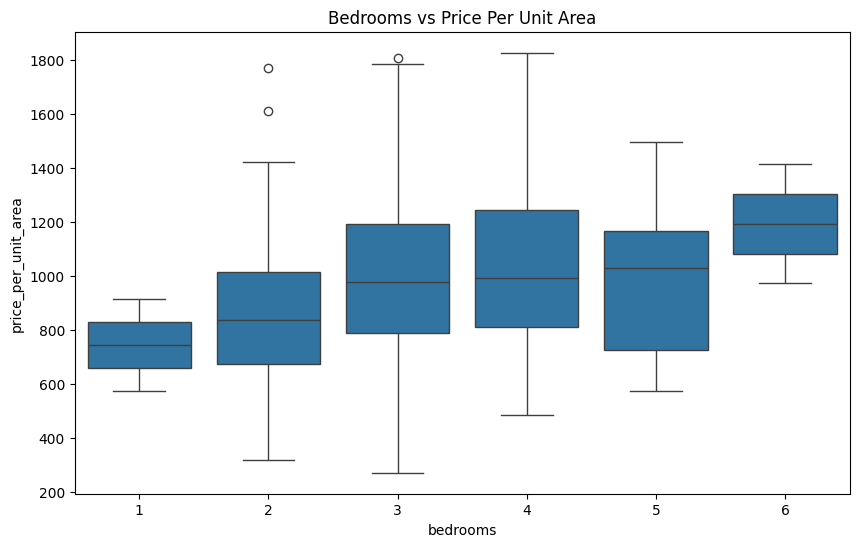

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price_per_unit_area', data=df)
plt.title('Bedrooms vs Price Per Unit Area')
plt.show()

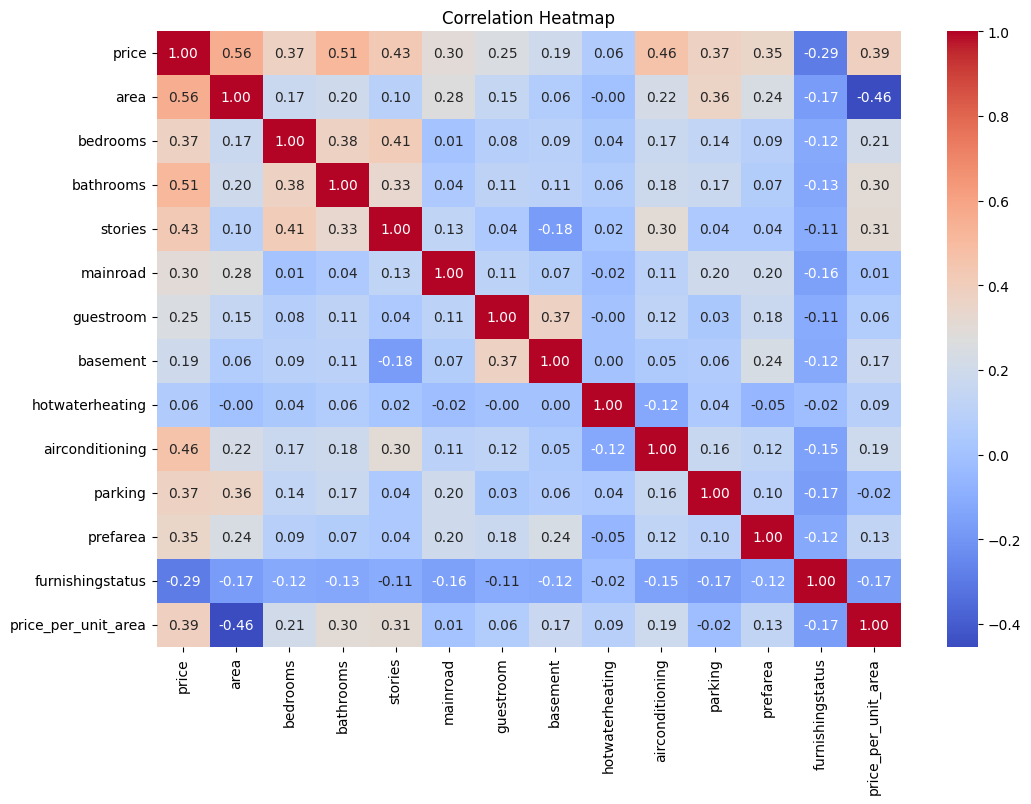

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [15]:
print(df.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  price_per_unit_area  
0                 0          1792.452830  
1                 0          1367.187500  
2                 1          